## 평가하기
### 분류, 검출, 분할 (Classifiaction, Detection, Segmentation)

### 분류문제 (Classifiaction Problem)
- 학습한 모델을 어떤 기준으로 평가를 해야하는가?
- 민감도 : 양성에 얼마나 민감한지? 판정한 것 중 실제 양성수 / 전체 양성 수 (ex, 암환자)
- 특이도 : 얼마나 특이한 것만 양성으로 골라낸 건지? 실제 음성 수 / 전체 음성 수

### ROC curve 그리기

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
sens_ga = np.array([1.0, 1.0, 1.0, 1.0, 0.75, 0.5, 0.5, 0.5, 0.5, 0.5,0.0])
spec_ga = np.array([0.0, 0.16, 0.5, 0.66, 0.66, 0.66, 0.83, 1.0, 1.0, 1.0, 1.0])

sens_na = np.array([1.0, 1.0, 0.75, 0.75, 0.5, 0.5, 0.5, 0.5, 0.25, 0.25, 0.0])
spec_na = np.array([0.0, 0.33, 0.33, 0.5, 0.5, 0.66, 0.66, 0.83, 0.83, 1.0, 1.0])

print(sens_ga.shape, spec_ga.shape, sens_na.shape, spec_na.shape)

(11,) (11,) (11,) (11,)


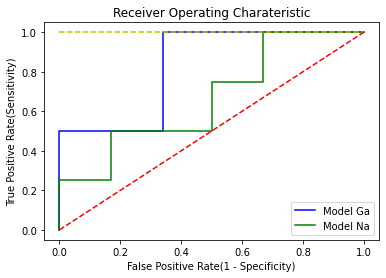

In [15]:
plt.title("Receiver Operating Charateristic")
plt.xlabel("False Positive Rate(1 - Specificity)")
plt.ylabel("True Positive Rate(Sensitivity)")

plt.plot(1-spec_ga, sens_ga, 'b', label='Model Ga')
plt.plot(1-spec_na, sens_na, 'g', label='Model Na')

plt.plot([0,1], [1,1], 'y--')
plt.plot([0,1], [0,1], 'r--')

plt.legend(loc='lower right')
plt.show()

### ROC curve, AUC 값 sklearn 패키지로 그리기

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [24]:
class_ga = np.array([0,0,0,0,1,1,0,0,1,1])
ploba_ga = np.array([0.05, 0.15, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.95, 0.95])

class_na = np.array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1])
ploba_na = np.array([0.05, 0.05, 0.15, 0.25, 0.35, 0.45, 0.65, 0.75, 0.85, 0.95])

In [25]:
false_positive_rate_ga, true_positive_rate_ga, threshold_ga = roc_curve(class_ga, ploba_ga)
false_positive_rate_na, true_positive_rate_na, threshold_na = roc_curve(class_na, ploba_na)

roc_auc_ga = auc(false_positive_rate_ga, true_positive_rate_ga)
roc_auc_na = auc(false_positive_rate_na, true_positive_rate_na)

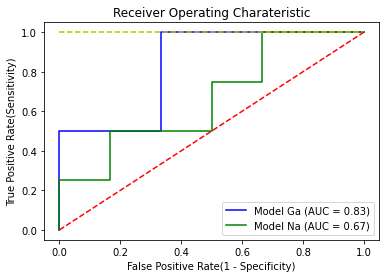

In [26]:
plt.title("Receiver Operating Charateristic")
plt.xlabel("False Positive Rate(1 - Specificity)")
plt.ylabel("True Positive Rate(Sensitivity)")

plt.plot(false_positive_rate_ga, true_positive_rate_ga, 'b', label="Model Ga (AUC = %0.2f)"%roc_auc_ga)
plt.plot(false_positive_rate_na, true_positive_rate_na, 'g', label="Model Na (AUC = %0.2f)"%roc_auc_na)

plt.plot([0,1], [1,1], 'y--')
plt.plot([0,1], [0,1], 'r--')

plt.legend(loc='lower right')
plt.show()

### 검출 문제 (Detection Problem)
- 어떤 모델이 더 좋을지에 대한 패턴을 보기 위해 Precision - Recall Graph